In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_dir = '../data/'

In [4]:
df_cvpr = pd.read_csv(data_dir + 'cvpr.csv')

In [5]:
df_cvpr.head()

,YEAR,TITLE,Authors,Paper Link,ABSTRACT
0,2018,Embodied Question Answering,"Abhishek Das, Samyak Datta, Georgia Gkioxari, ...",https://openaccess.thecvf.com/content_cvpr_201...,\nWe present a new AI task -- Embodied Questio...
1,2018,Learning by Asking Questions,"Ishan Misra, Ross Girshick, Rob Fergus, Martia...",https://openaccess.thecvf.com/content_cvpr_201...,\nWe introduce an interactive learning framewo...
2,2018,Finding Tiny Faces in the Wild With Generative...,"Yancheng Bai, Yongqiang Zhang, Mingli Ding, Be...",https://openaccess.thecvf.com/content_cvpr_201...,\nFace detection techniques have been develope...
3,2018,Learning Face Age Progression: A Pyramid Archi...,"Hongyu Yang, Di Huang, Yunhong Wang, Anil K. Jain",https://openaccess.thecvf.com/content_cvpr_201...,\nThe two underlying requirements of face age ...
4,2018,PairedCycleGAN: Asymmetric Style Transfer for ...,"Huiwen Chang, Jingwan Lu, Fisher Yu, Adam Fink...",https://openaccess.thecvf.com/content_cvpr_201...,\nThis paper introduces an automatic method fo...


In [6]:
df_cvpr.count()

YEAR          3739
TITLE         3739
Authors       3739
Paper Link    3739
ABSTRACT      3739
dtype: int64

In [12]:
df_nips = pd.read_csv(data_dir + 'nips.csv')

In [11]:
df_nips.count()

YEAR          3679
TITLE         3679
Authors       3677
Paper Link    3679
ABSTRACT      3679
dtype: int64

In [18]:
del df_nips['Unnamed: 5']

In [19]:
del df_nips['Unnamed: 6']

In [40]:
df_nips.head()

,YEAR,TITLE,Authors,Paper Link,ABSTRACT
0,2018.0,Synthesized Policies for Transfer and Adaptati...,"Hexiang Hu, Liyu Chen, Boqing Gong, Fei Sha",https://papers.nips.cc//paper/2018/hash/00ac8e...,The ability to transfer in reinforcement learn...
1,2018.0,Self-Supervised Generation of Spatial Audio fo...,"Pedro Morgado, Nuno Vasconcelos, Timothy Langl...",https://papers.nips.cc//paper/2018/hash/01161a...,We introduce an approach to convert mono audio...
2,2018.0,On GANs and GMMs,"Eitan Richardson, Yair Weiss",https://papers.nips.cc//paper/2018/hash/0172d2...,A longstanding problem in machine learning is ...
3,2018.0,Batch-Instance Normalization for Adaptively St...,"Hyeonseob Nam, Hyo-Eun Kim",https://papers.nips.cc//paper/2018/hash/018b59...,Real-world image recognition is often challeng...
4,2018.0,Hierarchical Reinforcement Learning for Zero-s...,"Sungryull Sohn, Junhyuk Oh, Honglak Lee",https://papers.nips.cc//paper/2018/hash/018dd1...,We introduce a new RL problem where the agent ...


# Plotting for CVPR

In [27]:
years = df_cvpr['YEAR'].unique()

In [28]:
years

array([2018, 2019, 2020])

In [52]:
papers_per_year_cvpr = dict()
for i in range(len(years)): 
    papers_per_year_cvpr.update({years[i]: 0})
for i in range(len(df_cvpr)): 
    papers_per_year_cvpr[df_cvpr['YEAR'][i]] +=1
print(papers_per_year_cvpr)

import math
papers_per_year_nips = dict()
for i in range(len(years)): 
    papers_per_year_nips.update({years[i]: 0})
for i in range(len(df_nips)):
    if math.isnan(df_nips['YEAR'][i]):
        continue
    papers_per_year_nips[int(df_nips['YEAR'][i])] +=1
print(papers_per_year_nips)

{2018: 979, 2019: 1294, 2020: 1466}
{2018: 867, 2019: 1205, 2020: 1607}


Text(0, 0.5, 'Number of Papers')

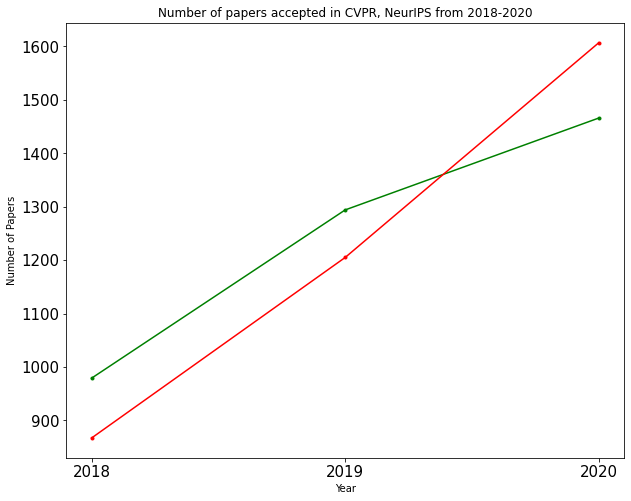

In [53]:
plt.figure(figsize=(10,8))
plt.title('Number of papers accepted in CVPR, NeurIPS from 2018-2020')
plt.plot(papers_per_year_cvpr.keys(), papers_per_year_cvpr.values(), c = 'green',  marker = '.')
plt.plot(papers_per_year_nips.keys(), papers_per_year_nips.values(), c = 'red',  marker = '.')
plt.xlabel('Year')
plt.xticks([2018,2019,2020], fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Number of Papers')